<a href="https://colab.research.google.com/github/BENDER1A4/DIGITAL_SIGNAL_PROCESSING_UNAL/blob/BENDER1A4-patch-1/FFT_%26__BAND_PASS_FILTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FFT_&_ BAND_PASS_FILTER


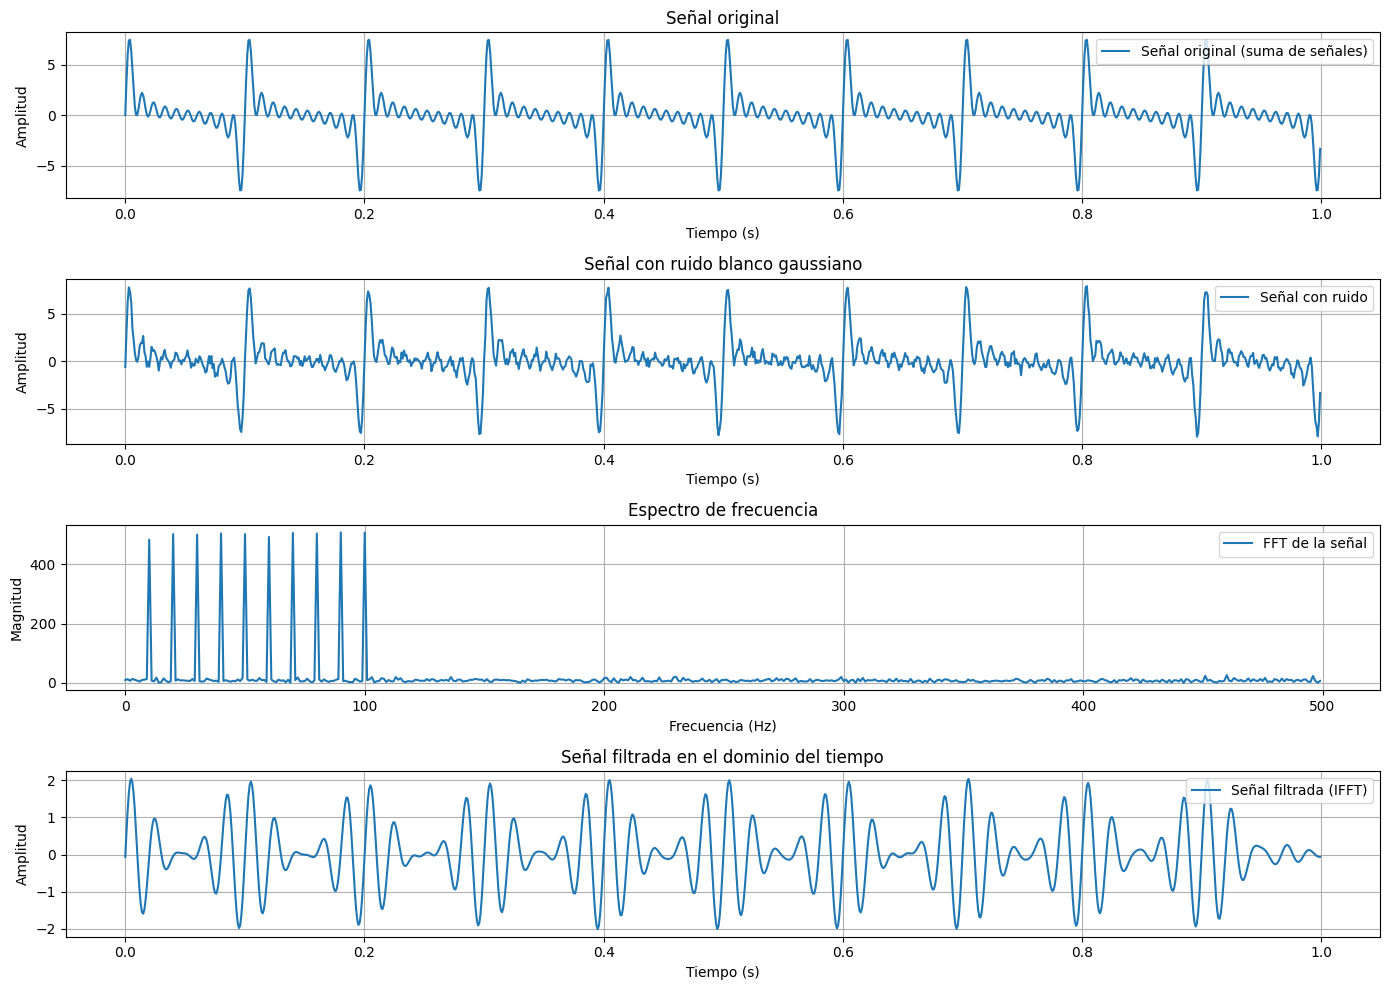

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import butter, filtfilt

# Generar señales con frecuencias de 10 Hz a 100 Hz
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de duración
frequencies = np.arange(10, 101, 10)  # Frecuencias de 10 a 100 Hz
signals = [np.sin(2 * np.pi * f * t) for f in frequencies]  # Lista de señales
signal_sum = np.sum(signals, axis=0)  # Suma de todas las señales

# Añadir ruido blanco gaussiano
noise_std = 0.3  # Desviación estándar del ruido
noisy_signal = signal_sum + np.random.normal(0, noise_std, len(t))

# FFT de la señal con ruido
fft_signal = fft(noisy_signal)
frequencies = np.fft.fftfreq(len(t), 1 / fs)

# Filtrar entre 40 y 60 Hz
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

filtered_signal = bandpass_filter(noisy_signal, 40, 60, fs)

# IFFT de la señal filtrada
ifft_signal = ifft(fft(filtered_signal))

# Graficar los resultados
plt.figure(figsize=(14, 10))

# Señal original sumada
plt.subplot(4, 1, 1)
plt.plot(t, signal_sum, label="Señal original (suma de señales)")
plt.title("Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Señal con ruido
plt.subplot(4, 1, 2)
plt.plot(t, noisy_signal, label="Señal con ruido")
plt.title("Señal con ruido blanco gaussiano")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Magnitud de la FFT
plt.subplot(4, 1, 3)
plt.plot(frequencies[:fs//2], np.abs(fft_signal)[:fs//2], label="FFT de la señal")
plt.title("Espectro de frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid()
plt.legend()

# Señal filtrada en el dominio del tiempo
plt.subplot(4, 1, 4)
plt.plot(t, np.real(ifft_signal), label="Señal filtrada (IFFT)")
plt.title("Señal filtrada en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In this exercise, sine waves (10 Hz to 100 Hz) were generated, summed, and combined with Gaussian noise. The signal was analyzed using FFT to identify frequency components. A bandpass filter (40-60 Hz) was applied, and the filtered signal was reconstructed in the time domain using IFFT, showing the cleaned, filtered signal.

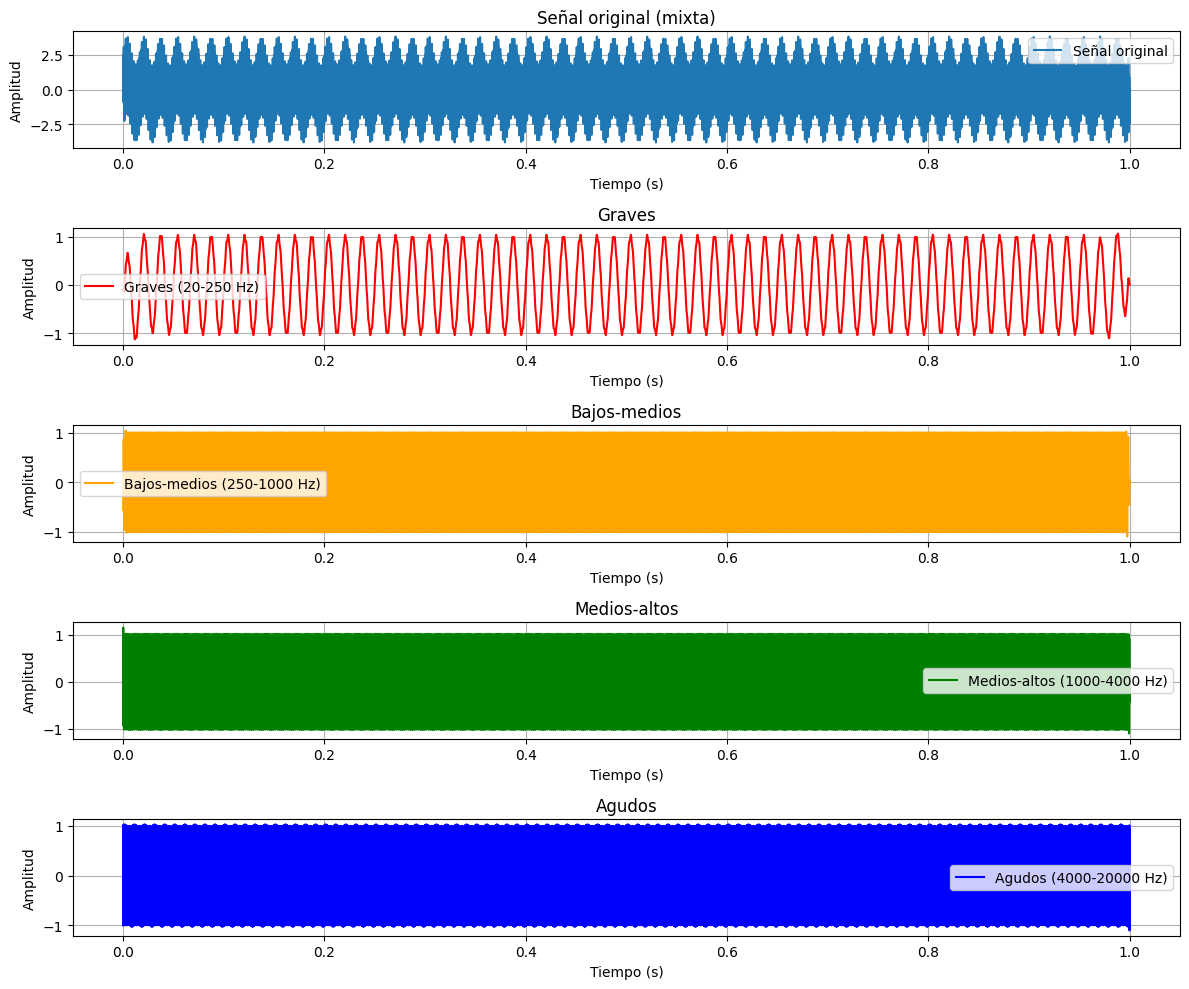

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Función para aplicar un filtro pasa bandas
def bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Parámetros de la señal
fs = 44100  # Frecuencia de muestreo típica para audio
t = np.linspace(0, 1, fs, endpoint=False)  # 1 segundo de duración

# Generar una señal mixta (suma de señales en diferentes rangos)
frequencies = [60, 500, 2000, 8000]  # Frecuencias representativas de cada banda
signal = sum(np.sin(2 * np.pi * f * t) for f in frequencies)

# Dividir la señal en las bandas del ecualizador
graves = bandpass_filter(signal, 20, 250, fs)          # Graves: 20-250 Hz
bajos_medios = bandpass_filter(signal, 250, 1000, fs)  # Bajos-medios: 250-1000 Hz
medios_altos = bandpass_filter(signal, 1000, 4000, fs) # Medios-altos: 1000-4000 Hz
agudos = bandpass_filter(signal, 4000, 20000, fs)      # Agudos: 4000-20000 Hz

# Graficar las señales originales y filtradas
plt.figure(figsize=(12, 10))

# Señal original
plt.subplot(5, 1, 1)
plt.plot(t, signal, label="Señal original")
plt.title("Señal original (mixta)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Graves
plt.subplot(5, 1, 2)
plt.plot(t, graves, label="Graves (20-250 Hz)", color="red")
plt.title("Graves")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Bajos-medios
plt.subplot(5, 1, 3)
plt.plot(t, bajos_medios, label="Bajos-medios (250-1000 Hz)", color="orange")
plt.title("Bajos-medios")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Medios-altos
plt.subplot(5, 1, 4)
plt.plot(t, medios_altos, label="Medios-altos (1000-4000 Hz)", color="green")
plt.title("Medios-altos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

# Agudos
plt.subplot(5, 1, 5)
plt.plot(t, agudos, label="Agudos (4000-20000 Hz)", color="blue")
plt.title("Agudos")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
